# Project: Investigate a Dataset: Medical Appointment No Shows



## Table of Contents
- [Introduction](#introduction)
- [Data Wrangling](#data_wrangling)
- [Exploratory Data Analysis](#eda)
- [Conclusions]() <----------

<a id='introduction'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Some columns are described here:
- "ScheduledDay" tells us on what day the patient set up their appointment.
- "Neighborhood" indicates the location of the hospital.
- "Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
- "No-show" indicates "Yes" if the patient did ***not*** show up and "No" if the patient showed up.

<a id='q_a'></a>
### Question(s) for Analysis
We are going to explore the data and look for answers to the following questions:
- Does the patient's age determine the likelihood of showing up to the appointment?
- Does the patient gender tell us if a patient is likely to show up to the appointment?
- Does it reduces the chances of the patient showing up if the appointment is scheduled far into the future?
- Do hypertension, diabetes, or alcoholism influence whether the patient shows up to the appointment?
- Does being handicapped influence whether the patient shows up to the appointment?
- Does being enrolled in Bolsa Familia correlate to patients showing up to the appointment?
- Does being alerted via SMS increases the chances of the patient showing up to the appointment?

<a id='data_wrangling'></a>
## Data Wrangling

### General Properties

In [85]:
# Setting up the packages to use in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
# Importing the dataset CSV file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are 110527 rows and 14 columns of data. 
The dataset does *not* have null values. 
The data types of the dates is object.

In [88]:
type(df['ScheduledDay'][0])

str

In [89]:
type(df['AppointmentDay'][0])

str

Both data types of the dates are strings, we'll need to convert those to the `datetime` data type.

In [90]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Seems like there's a minimum age of '-1' which is incongruent, we will discard these, and the maximum age is 115 which is possible so we will keep those rows. 

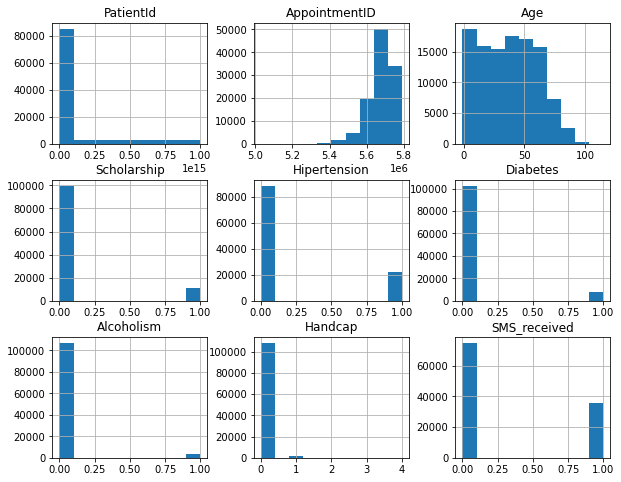

In [91]:
df.hist(figsize=(10,8));

In [92]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The indicators in the Scholarship, Hypertension, Diabetes, Alcoholism, and SMS_received are normal, there are only two variants, 1 and 0, yes or no, but there seem to be 5 numbers in handicap, we will check if the numbers of incidents apart from 0 and 1 are too many if so we might discard the column, and if there are a few incidents we will get rid of those rows. 

In [93]:
df.query('Handcap > 1').count()

PatientId         199
AppointmentID     199
Gender            199
ScheduledDay      199
AppointmentDay    199
Age               199
Neighbourhood     199
Scholarship       199
Hipertension      199
Diabetes          199
Alcoholism        199
Handcap           199
SMS_received      199
No-show           199
dtype: int64

There are only 199 occurrences of the Handicap indicator higher than 1. We will get rid of those rows.

In [94]:
df.query('Age == -1').count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

There's only 1 occurrence of Age '-1'. We'll get rid of that too. 

In [95]:
df[df.duplicated() == True].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no duplicated rows in this dataset. 

### Data Cleaning

In [96]:
df.rename(columns = str.lower, inplace=True)

In [97]:
df.rename(columns = {'no-show' : 'showed_up', 'hipertension' : 'hypertension', 'handcap' : 'handicap'}, inplace=True)

In [98]:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

In [99]:
df.head(3)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


We change the column labels to lowercase, convert to underscore the spaces between words, and translate the labels to the English language to have a consistent format.

We also drop the 'patientid' and 'appointmentid' columns because we won't be needing them.

The "no-show" values will be changed to have consistent indicators, right now "No" means the patient showed up, and "Yes" means the patient did ***not*** show up.

In [100]:
df['showed_up'] = df['showed_up'].map({'No':'Yes',
                                      'Yes':'No'},
                                      na_action=None)


In [101]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
type(df['scheduledday'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [102]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
type(df['appointmentday'][0])

pandas._libs.tslibs.timestamps.Timestamp

We convert the data types of the dates when the appointments were scheduled and the dates when the appointments took place to datetime stamps.

In [103]:
daysbetween = df['appointmentday'].dt.date - df['scheduledday'].dt.date
df['daysbetween'] = daysbetween.dt.days.view(int)
df.head(3)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,daysbetween
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,0


We now add a new column with the number of days between the scheduling of the appointment and the appointment itself. 

In [104]:
df[df['daysbetween'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,daysbetween
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,No,-1
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,No,-1
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,No,-1
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,No,-6
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,No,-1


We can see that some appointments were scheduled days after they were supposed to happen. 

In [105]:
df.drop(df.query('daysbetween < 0').index, inplace=True)

They are only 5 rows so we'll get rid of those. 

In [106]:
df.drop(df.query('handicap > 1').index, inplace=True);

We get rid of the handicap indicators above 1. There were only 199 of them, those might have been mistakes when entering the data. 

In [107]:
df.drop(df.query('age < 0').index, inplace=True)

We also get rid of the row with age '-1' because it does not make sense. 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question: Does the patient's age determine the likelihood of showing up to the appointment?

In [108]:
df_showed_up = df.query('showed_up == "Yes"')
df_not_showed_up = df.query('showed_up == "No"')

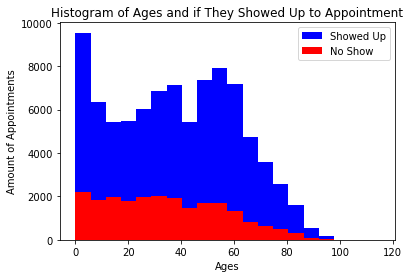

In [109]:
plt.hist(df_showed_up['age'], bins=20, color='blue')
plt.hist(df_not_showed_up['age'], bins=20, color='red')
plt.ylabel('Amount of Appointments')
plt.xlabel('Ages')
plt.title('Histogram of Ages and if They Showed Up to Appointment')
plt.legend(['Showed Up', 'No Show']);

It seems that there are more appointments for babies and young children and the majority of them show up to the appointment. There are fewer appointments made by people ages 10 - 25 approximately, presumably because they are healthier at that age. We see that for people ages 26 - 64 there is a growth in the number of appointments, except for a considerate decrease of appointments in people ages 41 - 48 approximately. The distribution is skewed to the right mainly because of the life expectancy. According to the data of the United Nations, in the period 2010 - 2015, in which this data was taken, Brazil had a life expectancy of 74.34.

 ### Research Question: Does the patient gender tell us if a patient is likely to show up to the appointment?

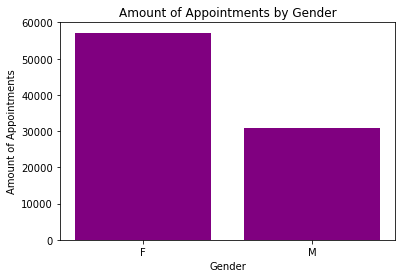

In [110]:
f_amount = df_showed_up.query('gender == "F"')['gender'].count()
m_amount = df_showed_up.query('gender == "M"')['gender'].count()
values = [f_amount, m_amount]
genders = ['F', 'M']

plt.bar(genders, values, color='purple')

plt.ylabel('Amount of Appointments')
plt.xlabel('Gender')
plt.title('Amount of Appointments by Gender');

In [111]:
percent_show_gender = df_showed_up['gender'].value_counts() / df_showed_up.shape[0] * 100
percent_show_gender

F    64.920669
M    35.079331
Name: gender, dtype: float64

In [112]:
percent_no_show_gender = df_not_showed_up['gender'].value_counts() / df_not_showed_up.shape[0] * 100
percent_no_show_gender

F    65.393077
M    34.606923
Name: gender, dtype: float64

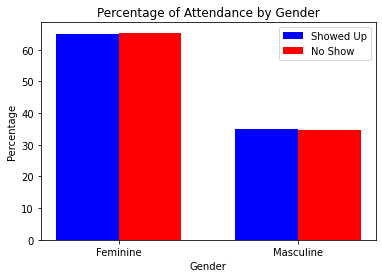

In [113]:
ind_x = np.arange(len(percent_show_gender))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_gender, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_gender, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.title('Percentage of Attendance by Gender')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['Feminine', 'Masculine']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

We see in the "Percentage of Attendance by Gender" chart that despite women having more appointments, roughly half of the men and half of the women don't show up to the appointment. There's **no** correlation between genders and not showing up to the appointment. 

### Research Question: Does it reduces the chances of the patient showing up if the appointment is scheduled far into the future?

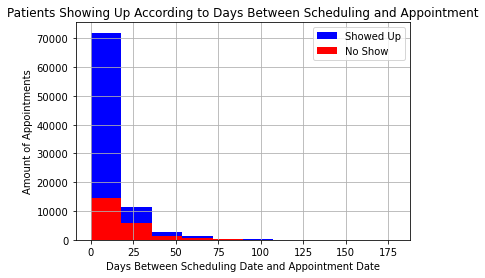

In [114]:
df_showed_up['daysbetween'].hist(color=['blue'])
df_not_showed_up['daysbetween'].hist(color=['red'])
plt.ylabel('Amount of Appointments')
plt.xlabel('Days Between Scheduling Date and Appointment Date')
plt.title('Patients Showing Up According to Days Between Scheduling and Appointment')
plt.legend(['Showed Up', 'No Show']);

We see that most of the appointments are close to the day of them being scheduled. But we need to see the proportions of each bin.

In [115]:
df.groupby('showed_up')['daysbetween'].describe()

,count,mean,std,min,25%,50%,75%,max
showed_up,,,,,,,,
No,22273.0,15.834778,16.600478,0.0,4.0,11.0,23.0,179.0
Yes,88049.0,8.758986,14.556123,0.0,0.0,2.0,12.0,179.0


In [116]:
bin_edges = [ 0, 7, 14, 30, 179 ]
bin_names = ['0-7 days', '8-14 days', '15-30 days', '31-179 days']
df['periodsdaysbetween'] = pd.cut(df['daysbetween'], bin_edges, labels=bin_names, include_lowest=True , right=True)

We separate the appointments into periods, and then we create a bar chart with the percentages of people showing up and *not* showing up.

In [117]:
df_showed_up = df.query('showed_up == "Yes"')
percent_show_daysbetween = df_showed_up['periodsdaysbetween'].value_counts() / df_showed_up.shape[0] * 100
percent_show_daysbetween

0-7 days       69.353428
15-30 days     13.275562
8-14 days       9.478813
31-179 days     7.892196
Name: periodsdaysbetween, dtype: float64

In [118]:
df_not_showed_up = df.query('showed_up == "No"')
percent_no_show_daysbetween = df_not_showed_up['periodsdaysbetween'].value_counts() / df_not_showed_up.shape[0] * 100
percent_no_show_daysbetween

0-7 days       42.845598
15-30 days     25.367036
8-14 days      16.441431
31-179 days    15.345935
Name: periodsdaysbetween, dtype: float64

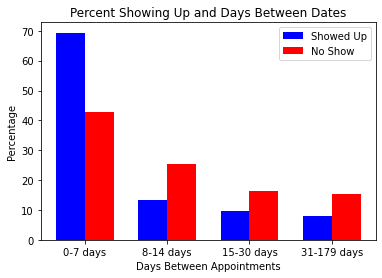

In [119]:
ind_x = np.arange(len(percent_show_daysbetween))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_daysbetween, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_daysbetween, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Days Between Appointments')
plt.title('Percent Showing Up and Days Between Dates')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['0-7 days', '8-14 days', '15-30 days', '31-179 days']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

We can see that the shorter the period between the scheduling date and the appointment date, the more likely the patient is to show up. We see a higher percentage of people not showing up if the appointment is scheduled longer than 8 days in advance.

### Research Question: Do hypertension, diabetes, or alcoholism influence whether the patient shows up to the appointment?

#### Hypertension

In [120]:
percent_show_hypertension = df_showed_up['hypertension'].value_counts() / df_showed_up.shape[0] * 100
percent_show_hypertension

0    79.593181
1    20.406819
Name: hypertension, dtype: float64

In [121]:
percent_no_show_hypertension = df_not_showed_up['hypertension'].value_counts() / df_not_showed_up.shape[0] * 100
percent_no_show_hypertension

0    83.172451
1    16.827549
Name: hypertension, dtype: float64

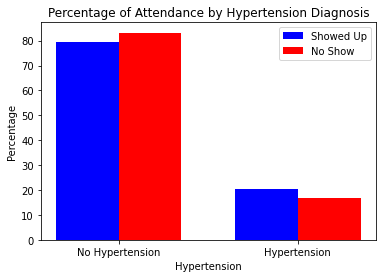

In [122]:
ind_x = np.arange(len(percent_show_hypertension))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_hypertension, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_hypertension, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Hypertension')
plt.title('Percentage of Attendance by Hypertension Diagnosis')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['No Hypertension', 'Hypertension']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

The percentage of people who have hypertension is significantly lower compared to the people who do not have the condition, and we see that people who have hypertension tend to assist their appointment 3.58% more than they miss it. 

#### Diabetes

In [123]:
percent_show_diabetes = df_showed_up['diabetes'].value_counts() / df_showed_up.shape[0] * 100
percent_show_diabetes

0    92.642733
1     7.357267
Name: diabetes, dtype: float64

In [124]:
percent_no_show_diabetes = df_not_showed_up['diabetes'].value_counts() / df_not_showed_up.shape[0] * 100
percent_no_show_diabetes

0    93.615588
1     6.384412
Name: diabetes, dtype: float64

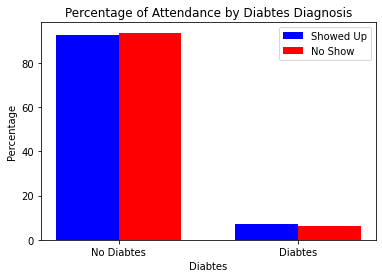

In [125]:
ind_x = np.arange(len(percent_show_diabetes))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_diabetes, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_diabetes, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Diabtes')
plt.title('Percentage of Attendance by Diabtes Diagnosis')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['No Diabtes', 'Diabtes']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

The percentage of people who have diabetes is even lower than the people who have hypertension and we see that there's no correlation between having diabetes and missing the appointment. 

#### Alcoholism

In [126]:
percent_show_alcoholism = df_showed_up['alcoholism'].value_counts() / df_showed_up.shape[0] * 100
percent_show_alcoholism

0    96.959647
1     3.040353
Name: alcoholism, dtype: float64

In [127]:
percent_no_show_alcoholism = df_not_showed_up['alcoholism'].value_counts() / df_not_showed_up.shape[0] * 100
percent_no_show_alcoholism

0    96.969425
1     3.030575
Name: alcoholism, dtype: float64

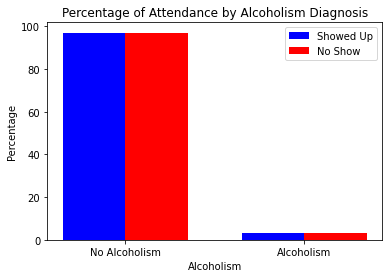

In [128]:
ind_x = np.arange(len(percent_show_alcoholism))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_alcoholism, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_alcoholism, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Alcoholism')
plt.title('Percentage of Attendance by Alcoholism Diagnosis')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['No Alcoholism', 'Alcoholism']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

We see there is a similar pattern between the people who have alcoholism and the people who have diabetes, although there are fewer people with alcoholism in these communities. 

### Research Question: Does being handicapped influence whether the patient shows up to the appointment?

In [129]:
percent_show_handicap = df_showed_up['handicap'].value_counts() / df_showed_up.shape[0] * 100
percent_show_handicap

0    98.096514
1     1.903486
Name: handicap, dtype: float64

In [130]:
percent_no_show_handicap = df_not_showed_up['handicap'].value_counts() / df_not_showed_up.shape[0] * 100
percent_no_show_handicap

0    98.365734
1     1.634266
Name: handicap, dtype: float64

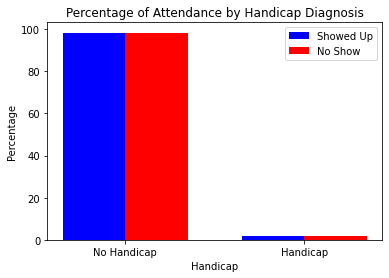

In [131]:
ind_x = np.arange(len(percent_show_handicap))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_handicap, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_handicap, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Handicap')
plt.title('Percentage of Attendance by Handicap Diagnosis')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['No Handicap', 'Handicap']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

The percentage of people handicapped is very low: less than 2% of people in these communities. There is **no** correlation between being handicapped and missing medical appointments. 

### Research Question: Does being enrolled in Bolsa Familia correlate to patients showing up to the appointment?

In [132]:
percent_show_scholarship = df_showed_up['scholarship'].value_counts() / df_showed_up.shape[0] * 100
percent_show_scholarship

0    90.612046
1     9.387954
Name: scholarship, dtype: float64

In [133]:
percent_no_show_scholarship = df_not_showed_up['scholarship'].value_counts() / df_not_showed_up.shape[0] * 100
percent_no_show_scholarship

0    88.429938
1    11.570062
Name: scholarship, dtype: float64

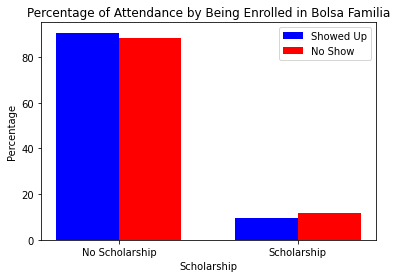

In [134]:
ind_x = np.arange(len(percent_show_scholarship))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_scholarship, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_scholarship, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Scholarship')
plt.title('Percentage of Attendance by Being Enrolled in Bolsa Familia')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['No Scholarship', 'Scholarship']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

There are more people who **do not** have insurance with Bolsa Familia. We can see that people who have this insurance miss their appointments by 2.19% more.

### Research Question: Does being alerted via SMS increases the chances of the patient showing up to the appointment?

In [135]:
percent_show_sms = df_showed_up['sms_received'].value_counts() / df_showed_up.shape[0] * 100
percent_show_sms

0    70.857136
1    29.142864
Name: sms_received, dtype: float64

In [136]:
percent_no_show_sms = df_not_showed_up['sms_received'].value_counts() / df_not_showed_up.shape[0] * 100
percent_no_show_sms

0    56.112782
1    43.887218
Name: sms_received, dtype: float64

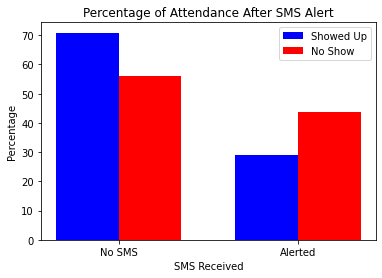

In [137]:
ind_x = np.arange(len(percent_show_sms))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_sms, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_sms, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('SMS Received')
plt.title('Percentage of Attendance After SMS Alert')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['No SMS', 'Alerted']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

The analysis shows that people who were alerted via SMS missed their appointments 14.74% more compared to people who **were not** alerted. 